In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import pyodbc

In [47]:


# Crear la cadena de conexión en formato URL para SQLAlchemy
conec_string = "mssql+pyodbc://@DESKTOP-9345VIR:1433/cripto_db?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"

# Crear el motor de conexión con SQLAlchemy
engine = create_engine(conec_string)




In [65]:
consulta = 'SELECT * FROM dbo.precios_cripto'


In [74]:
data_frame = pd.read_sql(consulta,engine)

In [69]:
# Verifica las tablas disponibles en la base de datos
consulta_verificacion = "SELECT TABLE_NAME FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_TYPE='BASE TABLE'"
tablas_disponibles = pd.read_sql(consulta_verificacion, engine)

# Muestra las tablas disponibles
print(tablas_disponibles)

        TABLE_NAME
0  precios_criptos


In [71]:
consulta = "SELECT * FROM precios_criptos"

In [72]:
data_frame = pd.read_sql(consulta, engine)

In [73]:
data_frame.head()

,id,moneda,marca_tiempo,precio
0,1,BTC,2023-10-24,32953.262761
1,2,BTC,2023-10-25,33846.724257
2,3,BTC,2023-10-26,34471.986032
3,4,BTC,2023-10-27,34174.451553
4,5,BTC,2023-10-28,33899.093056


In [75]:
data_frame.isnull()

,id,moneda,marca_tiempo,precio
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
1093,False,False,False,False
1094,False,False,False,False
1095,False,False,False,False
1096,False,False,False,False


In [76]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            1098 non-null   int64         
 1   moneda        1098 non-null   object        
 2   marca_tiempo  1098 non-null   datetime64[ns]
 3   precio        1098 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 34.4+ KB


In [77]:
data_frame.columns

Index(['id', 'moneda', 'marca_tiempo', 'precio'], dtype='object')

In [79]:
#filtramos los datos por moneda
btc_data = data_frame[data_frame['moneda'] == 'BTC']
eth_data = data_frame[data_frame['moneda'] == 'ETH']
ada_data = data_frame[data_frame['moneda'] == 'ADA']

In [80]:
btc_data.head()

,id,moneda,marca_tiempo,precio
0,1,BTC,2023-10-24,32953.262761
1,2,BTC,2023-10-25,33846.724257
2,3,BTC,2023-10-26,34471.986032
3,4,BTC,2023-10-27,34174.451553
4,5,BTC,2023-10-28,33899.093056


In [81]:
eth_data.head()

,id,moneda,marca_tiempo,precio
366,367,ETH,2023-10-24,1764.930309
367,368,ETH,2023-10-25,1784.773411
368,369,ETH,2023-10-26,1785.555149
369,370,ETH,2023-10-27,1804.161769
370,371,ETH,2023-10-28,1780.570412


In [82]:
ada_data.head()

,id,moneda,marca_tiempo,precio
732,733,ADA,2023-10-24,0.278887
733,734,ADA,2023-10-25,0.278896
734,735,ADA,2023-10-26,0.280325
735,736,ADA,2023-10-27,0.287475
736,737,ADA,2023-10-28,0.289344


In [84]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

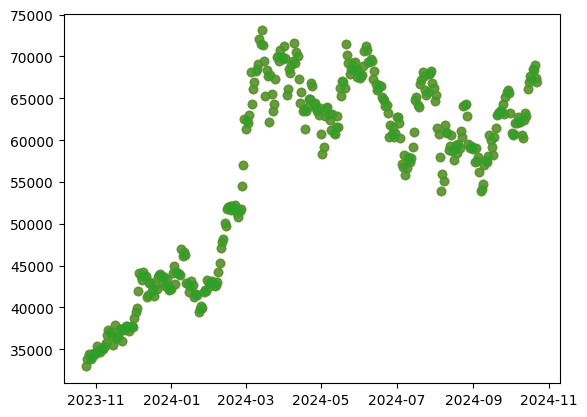

In [86]:
#graficamos cada moneda primero
plt.scatter(btc_data['marca_tiempo'], btc_data['precio'], label='BTC', alpha=0.6)



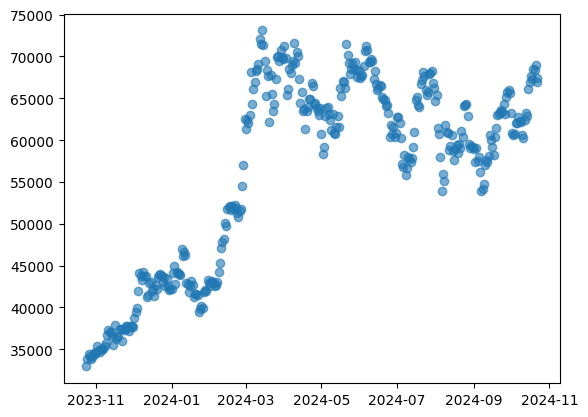

In [90]:
plt.scatter(eth_data['marca_tiempo'], btc_data['precio'], label='ETH', alpha=0.6)

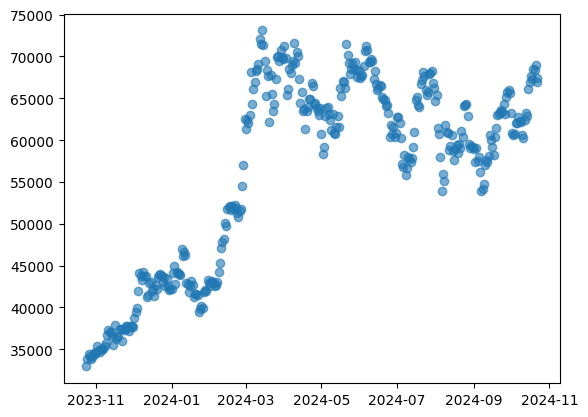

In [89]:
plt.scatter(ada_data['marca_tiempo'], btc_data['precio'], label='ADA', alpha=0.6)

In [96]:
plt.


In [98]:
#agrupamos por moneda con groupby
stats = data_frame.groupby('moneda')['precio'].describe()

In [100]:
print(stats)

        count          mean           std           min           25%  \
moneda                                                                  
ADA     366.0      0.461960      0.114660      0.278887      0.364907   
BTC     366.0  56300.645809  11448.024581  32953.262761  43765.542155   
ETH     366.0   2817.638766    581.663059   1764.930309   2341.268055   

                 50%           75%           max  
moneda                                            
ADA         0.441361      0.546934      0.774975  
BTC     60691.711872  65631.762012  73097.767027  
ETH      2672.975321   3335.307649   4070.604075  


In [101]:
#obtenemos medidas de estadistica
media = data_frame.groupby('moneda')['precio'].mean()
mediana = data_frame.groupby('moneda')['precio'].median()
desviacion_standar = data_frame.groupby('moneda')['precio'].std()


In [105]:
#media
media


moneda
ADA        0.461960
BTC    56300.645809
ETH     2817.638766
Name: precio, dtype: float64

In [106]:
#mediana
mediana


moneda
ADA        0.441361
BTC    60691.711872
ETH     2672.975321
Name: precio, dtype: float64

In [107]:
#desviacion estandar
desviacion_standar

moneda
ADA        0.114660
BTC    11448.024581
ETH      581.663059
Name: precio, dtype: float64

In [109]:
import seaborn as sns


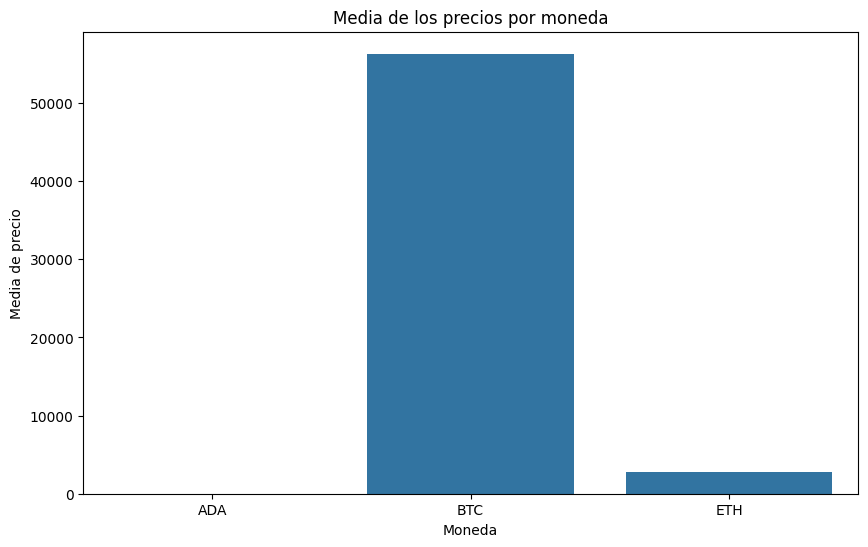

In [110]:
plt.figure(figsize=(10,6))
sns.barplot(x=media.index, y=media.values)
plt.title('Media de los precios por moneda')
plt.xlabel('Moneda')
plt.ylabel('Media de precio')
plt.show()

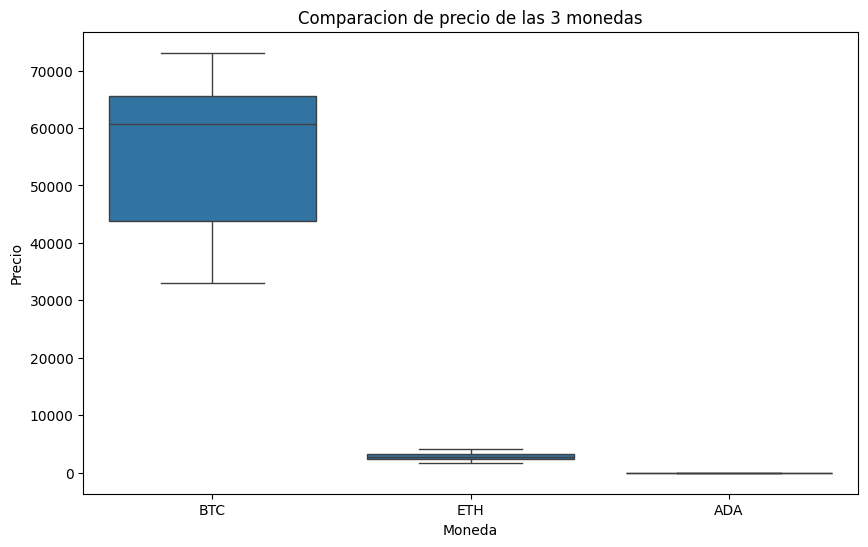

In [111]:
plt.figure(figsize=(10,6))
sns.boxplot(x='moneda',y='precio', data=data_frame)
plt.title('Comparacion de precio de las 3 monedas')
plt.xlabel('Moneda')
plt.ylabel('Precio')
plt.show()

In [112]:
#grafico del precio en el tiempo

data_frame['fecha'] = data_frame['marca_tiempo'].dt.date
precio_tiempo = data_frame.groupby(['fecha','moneda'])['precio'].mean().reset_index()

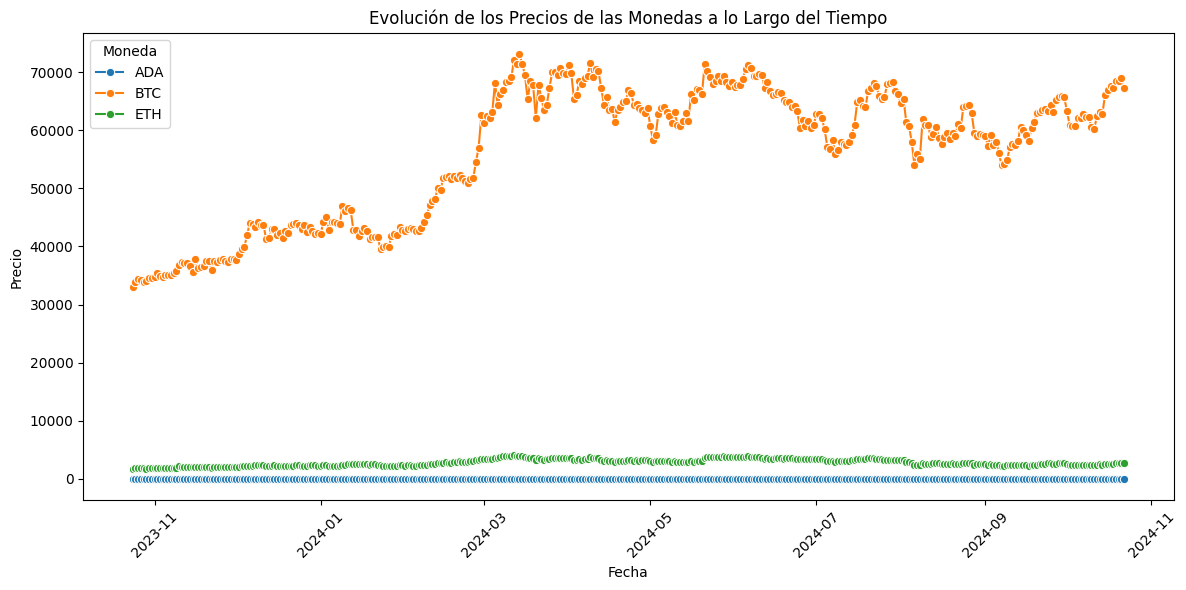

In [115]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=precio_tiempo, x='fecha', y='precio', hue='moneda', marker='o')
plt.title('Evolución de los Precios de las Monedas a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.legend(title='Moneda')
plt.tight_layout()
plt.show()